# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os

# Import the OpenWeatherMap API key
from dotenv import load_dotenv
load_dotenv()
weather_api_key = os.getenv("open_weather_api_key")

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 630


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + '&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
                
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["main"]["temp_max"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | iqaluit
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | provideniya
Processing Record 6 of Set 1 | arraial do cabo
Processing Record 7 of Set 1 | ballina
Processing Record 8 of Set 1 | nikolskoye
Processing Record 9 of Set 1 | lompoc
Processing Record 10 of Set 1 | longyearbyen
Processing Record 11 of Set 1 | shakiso
Processing Record 12 of Set 1 | barrow
Processing Record 13 of Set 1 | meyungs
City not found. Skipping...
Processing Record 14 of Set 1 | ilulissat
Processing Record 15 of Set 1 | moose factory
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | yelan
Processing Record 18 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 19 of Set 1 | bang saphan
Processing Record 20 of Set 1 | bredasdorp
Processing Record 21 of Set 1 | poum
Processing Record

Processing Record 39 of Set 4 | victoria
Processing Record 40 of Set 4 | cockburn town
Processing Record 41 of Set 4 | kemin
Processing Record 42 of Set 4 | bethel
Processing Record 43 of Set 4 | mayo
Processing Record 44 of Set 4 | torbay
Processing Record 45 of Set 4 | ambon
Processing Record 46 of Set 4 | souillac
Processing Record 47 of Set 4 | ondjiva
Processing Record 48 of Set 4 | phan rang
City not found. Skipping...
Processing Record 49 of Set 4 | inuvik
Processing Record 0 of Set 5 | parabel
Processing Record 1 of Set 5 | yangjiang
Processing Record 2 of Set 5 | moree
Processing Record 3 of Set 5 | kirakira
Processing Record 4 of Set 5 | marilia
Processing Record 5 of Set 5 | new norfolk
Processing Record 6 of Set 5 | aflu
City not found. Skipping...
Processing Record 7 of Set 5 | wa
City not found. Skipping...
Processing Record 8 of Set 5 | pangai
Processing Record 9 of Set 5 | phek
Processing Record 10 of Set 5 | urdoma
Processing Record 11 of Set 5 | saint anthony
Processi

Processing Record 26 of Set 8 | marovoay
Processing Record 27 of Set 8 | bealanana
Processing Record 28 of Set 8 | dakar
Processing Record 29 of Set 8 | red deer
Processing Record 30 of Set 8 | le port
Processing Record 31 of Set 8 | nachalovo
Processing Record 32 of Set 8 | zhuanghe
Processing Record 33 of Set 8 | kamenka
Processing Record 34 of Set 8 | okmulgee
Processing Record 35 of Set 8 | saint-pierre
Processing Record 36 of Set 8 | rosetta
Processing Record 37 of Set 8 | panaba
Processing Record 38 of Set 8 | artyk
City not found. Skipping...
Processing Record 39 of Set 8 | vzmorye
Processing Record 40 of Set 8 | bardiyah
Processing Record 41 of Set 8 | touros
Processing Record 42 of Set 8 | fort nelson
Processing Record 43 of Set 8 | amderma
City not found. Skipping...
Processing Record 44 of Set 8 | byron bay
Processing Record 45 of Set 8 | cayenne
Processing Record 46 of Set 8 | skibbereen
Processing Record 47 of Set 8 | half moon bay
Processing Record 48 of Set 8 | pangnirtu

Processing Record 8 of Set 12 | bonavista
Processing Record 9 of Set 12 | aykhal
Processing Record 10 of Set 12 | bestobe
Processing Record 11 of Set 12 | tabuk
Processing Record 12 of Set 12 | gat
Processing Record 13 of Set 12 | andenes
Processing Record 14 of Set 12 | port blair
Processing Record 15 of Set 12 | kurilsk
Processing Record 16 of Set 12 | yantzaza
Processing Record 17 of Set 12 | lidzbark warminski
Processing Record 18 of Set 12 | trairi
Processing Record 19 of Set 12 | high level
Processing Record 20 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 21 of Set 12 | mecca
Processing Record 22 of Set 12 | rypin
Processing Record 23 of Set 12 | villeneuve-sur-lot
Processing Record 24 of Set 12 | balkhash
Processing Record 25 of Set 12 | baracoa
Processing Record 26 of Set 12 | ubaitaba
Processing Record 27 of Set 12 | brigantine
Processing Record 28 of Set 12 | honningsvag
Processing Record 29 of Set 12 | muttupet
Processing Record 30 of Set 12 | morant bay
Processin

In [23]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [24]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,4.29,43,100,1.79,4.29,1675800886
1,iqaluit,63.7506,-68.5145,-32.95,67,100,2.68,-32.95,1675801023
2,jamestown,42.0970,-79.2353,8.77,60,100,4.63,8.77,1675800759
3,punta arenas,-53.1500,-70.9167,17.01,51,75,8.23,17.01,1675801001
4,provideniya,64.3833,-173.3000,-27.16,94,58,1.66,-27.16,1675801027


In [25]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [26]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,4.29,43,100,1.79,4.29,1675800886
1,iqaluit,63.7506,-68.5145,-32.95,67,100,2.68,-32.95,1675801023
2,jamestown,42.0970,-79.2353,8.77,60,100,4.63,8.77,1675800759
3,punta arenas,-53.1500,-70.9167,17.01,51,75,8.23,17.01,1675801001
4,provideniya,64.3833,-173.3000,-27.16,94,58,1.66,-27.16,1675801027


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

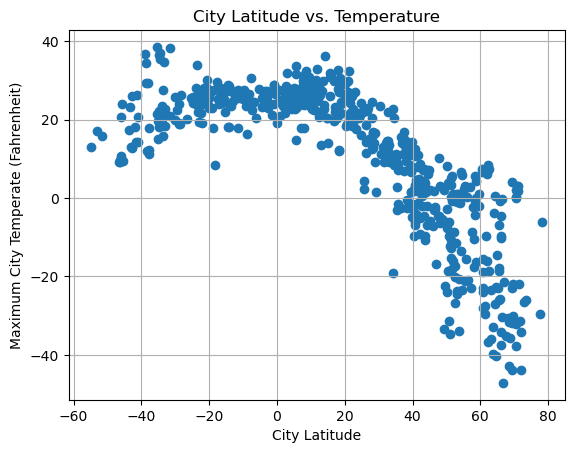

In [27]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker='o')

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature")
plt.xlabel("City Latitude")
plt.ylabel("Maximum City Temperate (Fahrenheit)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

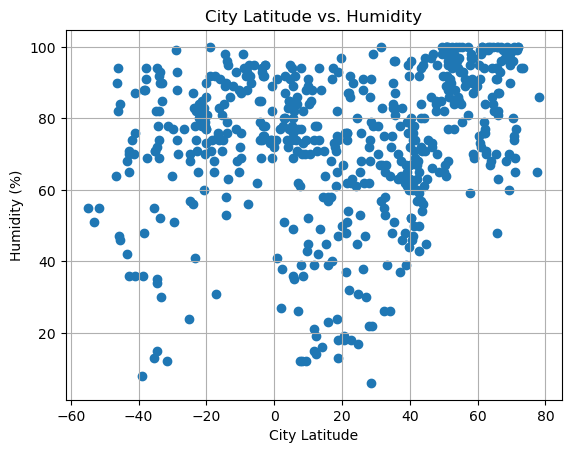

In [28]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker='o')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("City Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

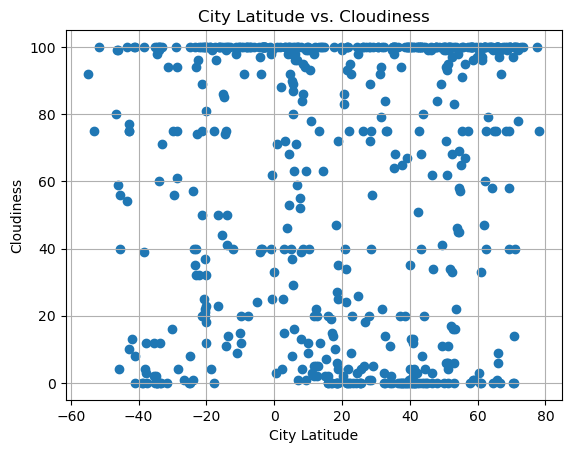

In [29]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker='o')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

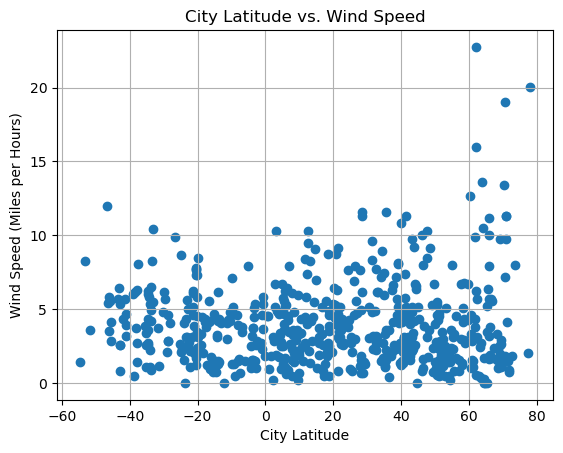

In [30]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker='o')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed (Miles per Hours)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [31]:
# Define a function to create Linear Regression plots
def reglinefun(x_values, y_values, x_label, y_label, title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept 
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,(10,10),fontsize=15,color='red')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    return plt.show()

In [32]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,4.29,43,100,1.79,4.29,1675800886
1,iqaluit,63.7506,-68.5145,-32.95,67,100,2.68,-32.95,1675801023
2,jamestown,42.0970,-79.2353,8.77,60,100,4.63,8.77,1675800759
4,provideniya,64.3833,-173.3000,-27.16,94,58,1.66,-27.16,1675801027
7,nikolskoye,59.7035,30.7861,-2.06,89,97,4.26,-2.06,1675801031


In [33]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,punta arenas,-53.1500,-70.9167,17.01,51,75,8.23,17.01,1675801001
5,arraial do cabo,-22.9661,-42.0278,26.92,83,40,3.09,26.92,1675801028
6,ballina,-28.8667,153.5667,18.90,99,100,2.08,18.90,1675801030
14,ushuaia,-54.8000,-68.3000,12.96,55,92,1.42,12.96,1675800995
17,bredasdorp,-34.5322,20.0403,20.29,72,100,4.34,20.29,1675801042


###  Temperature vs. Latitude Linear Regression Plot

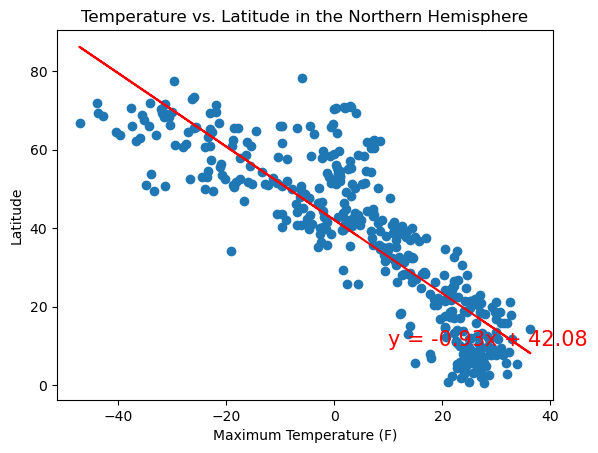

In [34]:
# Linear regression on Northern Hemisphere
reglinefun(northern_hemi_df["Max Temp"],northern_hemi_df["Lat"], 
                        "Maximum Temperature (F)", "Latitude", 
                        "Temperature vs. Latitude in the Northern Hemisphere")

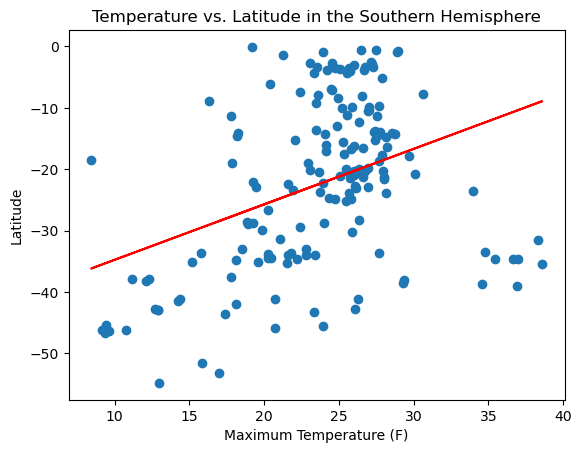

In [35]:
# Linear regression on Southern Hemisphere
reglinefun(southern_hemi_df["Max Temp"],southern_hemi_df["Lat"], 
                        "Maximum Temperature (F)", "Latitude", 
                        "Temperature vs. Latitude in the Southern Hemisphere")

**Discussion about the linear relationship:** In the Northern Hemisphere, there is strong negative correlation between latitude and temperature, meaning that as the latitude increases, the maximum temperature decreases. In the Southern Hemisphere, there is a weaker positive correlation between latitude and temperature, meaning that as the latitude decreases, the maximum temperature decreases at a much weaker correlation than the one shown in the Northern Hemisphere. 

### Humidity vs. Latitude Linear Regression Plot

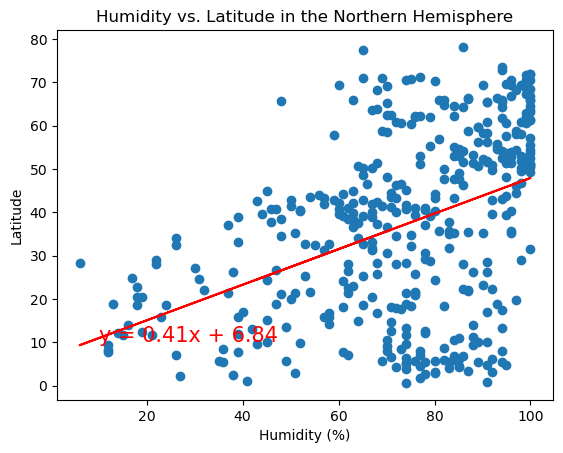

In [36]:
# Northern Hemisphere
reglinefun(northern_hemi_df["Humidity"],northern_hemi_df["Lat"], 
                        "Humidity (%)", "Latitude", 
                        "Humidity vs. Latitude in the Northern Hemisphere")

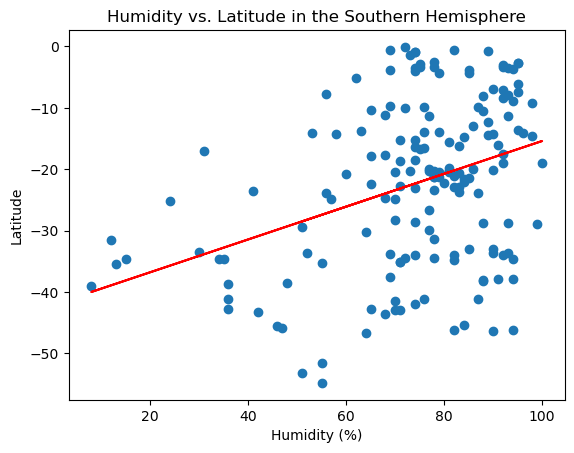

In [37]:
# Southern Hemisphere
reglinefun(southern_hemi_df["Humidity"],southern_hemi_df["Lat"], 
                        "Humidity (%)", "Latitude", 
                        "Humidity vs. Latitude in the Southern Hemisphere")

**Discussion about the linear relationship:** In the Northern Hemisphere, there is moderate positive correlation between humidity and temperature, meaning that as the latitude increases, the humidity increases. In the Southern Hemisphere, there is also a positive correlation between humidity and temperature. It is important to note that most of the data is skewed in the direction of higher humidity, meaning that the Southern Hempishere is generally more humid.

### Cloudiness vs. Latitude Linear Regression Plot

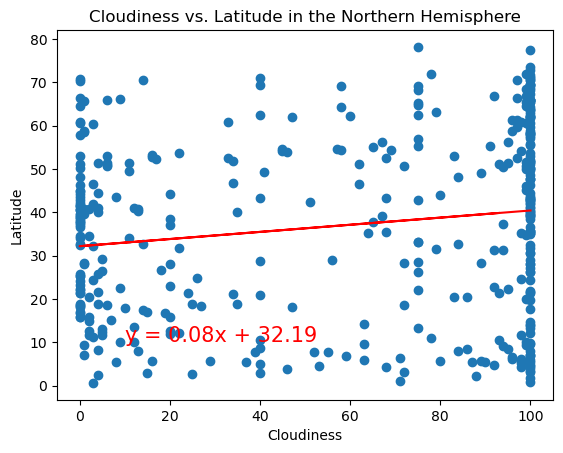

In [38]:
reglinefun(northern_hemi_df["Cloudiness"],northern_hemi_df["Lat"], 
                        "Cloudiness", "Latitude", 
                        "Cloudiness vs. Latitude in the Northern Hemisphere")

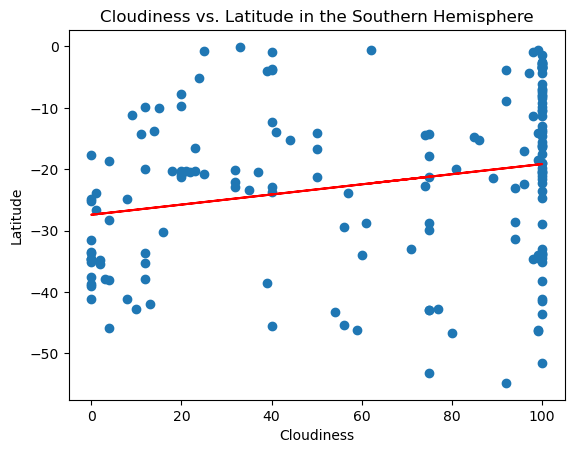

In [39]:
# Southern Hemisphere
reglinefun(southern_hemi_df["Cloudiness"],southern_hemi_df["Lat"], 
                        "Cloudiness", "Latitude", 
                        "Cloudiness vs. Latitude in the Southern Hemisphere")

**Discussion about the linear relationship:** In both the Northern and Southern Hemisphere there is a very weak positive correlation between increase in latitude and cloudiness. However, it is so minor it may not be significant (cannot tell without a Pearson correlation coefficient). It is important to note that cloudiness is mostly a binary factor (especially in the Northern Hemisphere), with the heaviest concentration of records being on the high and low end of cloudiness with little in the middle.

### Wind Speed vs. Latitude Linear Regression Plot

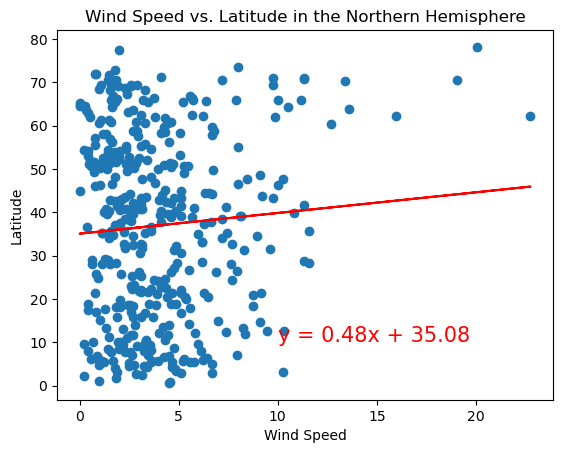

In [40]:
# Northern Hemisphere
reglinefun(northern_hemi_df["Wind Speed"],northern_hemi_df["Lat"], 
                        "Wind Speed", "Latitude", 
                        "Wind Speed vs. Latitude in the Northern Hemisphere")

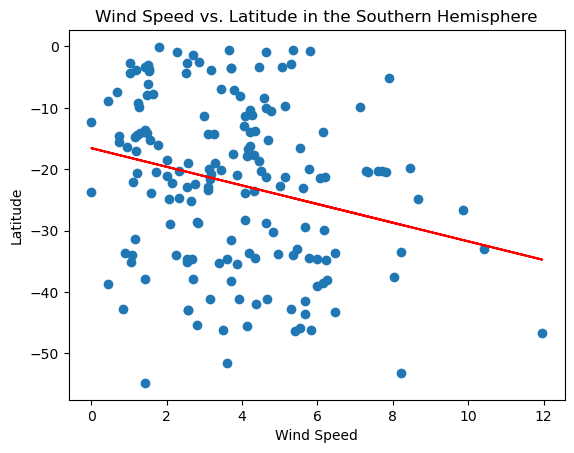

In [41]:
# Southern Hemisphere
reglinefun(southern_hemi_df["Wind Speed"],southern_hemi_df["Lat"], 
                        "Wind Speed", "Latitude", 
                        "Wind Speed vs. Latitude in the Southern Hemisphere")

**Discussion about the linear relationship:** In the Northern Hemisphere, there is a slight positive correlation between increased latitude and increased wind speed, with the majority of wind speeds skewing lower. In the Southern Hemisphere, there is a slight negative correlation decreased latitude and increased wind speed, meaining the further from the equator, the lower the winds. 